In [1]:
%load_ext autoreload
%autoreload 2

# Importy

In [1]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from utils import *

# Przetwarzanie danych

In [3]:
dataframes = read_csv("./datasets", 'csv')

In [4]:
res = prepare_dataframes(dataframes)

  0%|          | 0/3 [00:00<?, ?it/s]

out_hum
pressure
out_temp


In [5]:
df = get_labels(res, '2024-02-13')

In [6]:
df['rain_1h'] = df['rain_1h'].fillna(0)
df['snow_1h'] = df['snow_1h'].fillna(0)
df['total percipitation'] = df['rain_1h'] + df['snow_1h']

In [7]:
df['last_changed_count'] = df.groupby('last_changed')['last_changed'].transform('count')
df = df.drop_duplicates(subset=['last_changed'])
df = df.loc[:, ['last_changed', 'pressure', 'out_temp', 'out_hum', 'total percipitation']]
df = df.reset_index(drop=True)

In [8]:
df

,last_changed,pressure,out_temp,out_hum,total percipitation
0,2023-09-20 00:00:00+00:00,986.000000,15.300000,76.000000,0.00
1,2023-09-20 01:00:00+00:00,985.428571,14.528571,78.900000,0.00
2,2023-09-20 02:00:00+00:00,985.760000,14.212500,79.500000,0.00
3,2023-09-20 03:00:00+00:00,985.280000,14.041667,81.300000,0.00
4,2023-09-20 04:00:00+00:00,985.666667,13.833333,83.333333,0.25
...,...,...,...,...,...
3499,2024-02-12 19:00:00+00:00,974.777778,7.220000,85.166667,0.00
3500,2024-02-12 20:00:00+00:00,975.846154,7.020000,84.933333,0.00
3501,2024-02-12 21:00:00+00:00,976.846154,6.566667,84.033333,0.00
3502,2024-02-12 22:00:00+00:00,976.521739,6.370000,83.873913,0.00


# Występowanie opadów w czasie

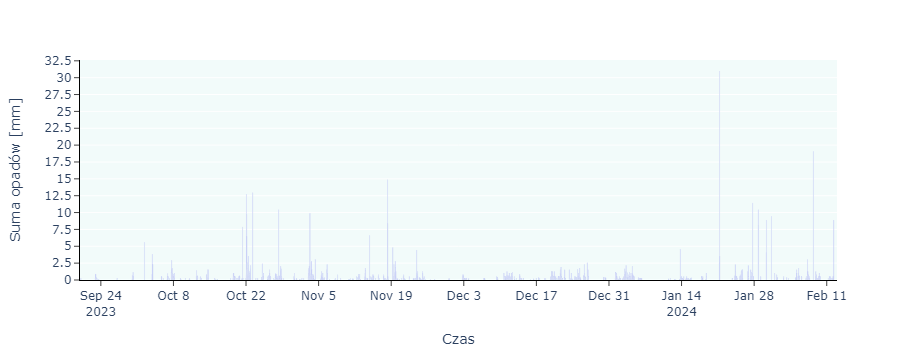

In [64]:
fig = px.bar(
    df,
    x="last_changed",
    y="total percipitation",
    color_discrete_sequence=['#0000ff'], #'#0000ff']
)

fig.update_layout(plot_bgcolor='#f2fbfa') 

fig.update_xaxes(
    title_text="Czas",
    showline=True,
    linewidth=1,
    linecolor='black',
    ticks='outside'
)

fig.update_yaxes(
    title_text="Suma opadów [mm]",
    tickmode='linear',
    tick0=0,
    dtick=2.5,
    ticks='outside',
    linewidth=1,
    linecolor='black'
)

fig.show()

# Histogram sumy opadów

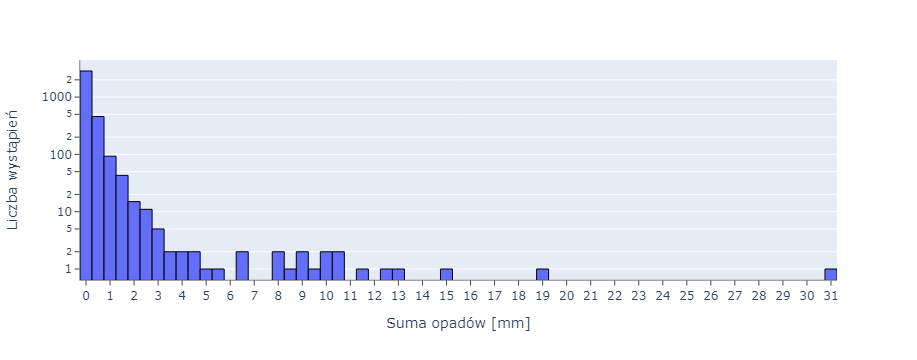

In [65]:
fig = px.histogram(df, x=df['total percipitation'], nbins = 100)

fig.update_layout(yaxis_type='log')

fig.update_xaxes(
    title='Suma opadów [mm]',
    showline=True,
    linewidth=0.5,
    linecolor='black',
    tickmode='linear',
    ticks="outside",
)

fig.update_yaxes(
    title='Liczba wystąpień',
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
#fig.update_xaxes(range=[0, df['total percipitation'].max()+0.1])


#new_num_bins = 31  # Change this value as needed
#fig.update_traces(nbinsx=new_num_bins)

fig.show()

In [11]:
df['total percipitation'].max()

30.99

In [12]:
df['total percipitation'].min()

0.0

In [44]:
#print (list(df['total percipitation'].sort_values()))

# Pomiar temperatury w czasie

In [70]:
df['out_temp'].max()

25.927272727272726

In [71]:
df['out_temp'].min()

-11.691666666666666

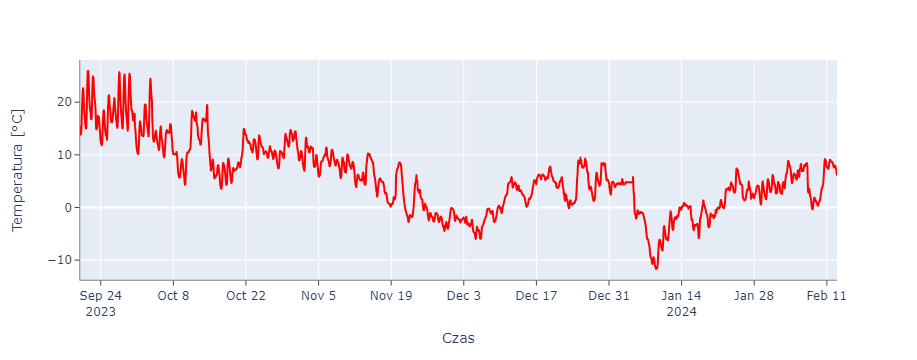

In [57]:
fig = px.line(
    df,
    x="last_changed",
    y="out_temp",
    color_discrete_sequence=['red'],
)

fig.update_xaxes(
    title='Czas',
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.update_yaxes(
    title='Temperatura [°C]',
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.show()

# Pomiar wilgotności w czasie

In [72]:
df['out_hum'].max()

98.48

In [73]:
df['out_hum'].min()

37.75454545454545

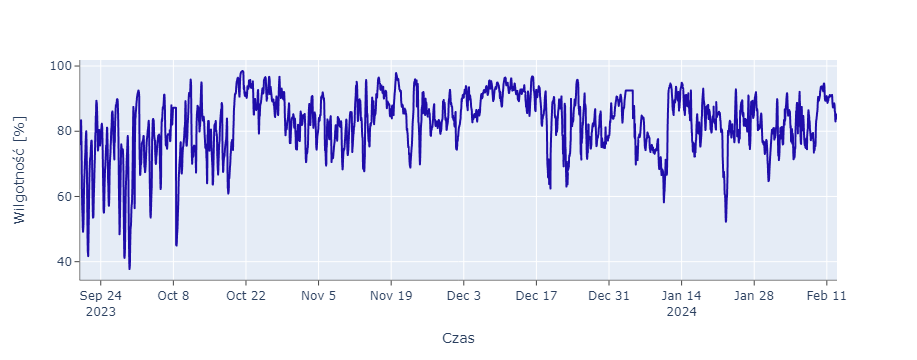

In [58]:
fig = px.line(
    df,
    x="last_changed",
    y="out_hum",
    color_discrete_sequence=['#1f0daa'],
)

fig.update_xaxes(
    title='Czas',
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.update_yaxes(
    title='Wilgotność [%]',
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.show()

# Pomiar ciśnienia w czasie

In [74]:
df['pressure'].max()

1007.969696969697

In [75]:
df['pressure'].min()

950.4285714285714

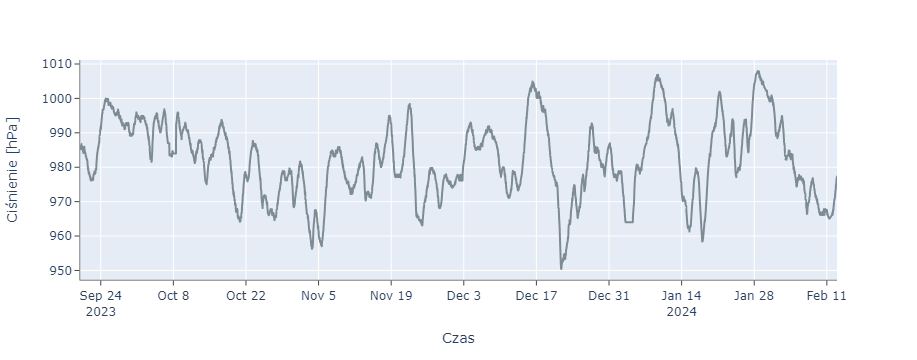

In [61]:
fig = px.line(
    df,
    x="last_changed",
    y="pressure",
    color_discrete_sequence=['#7d8b94'],
)

fig.update_xaxes(
    title='Czas',
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.update_yaxes(
    title='Ciśnienie [hPa]',
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.show()

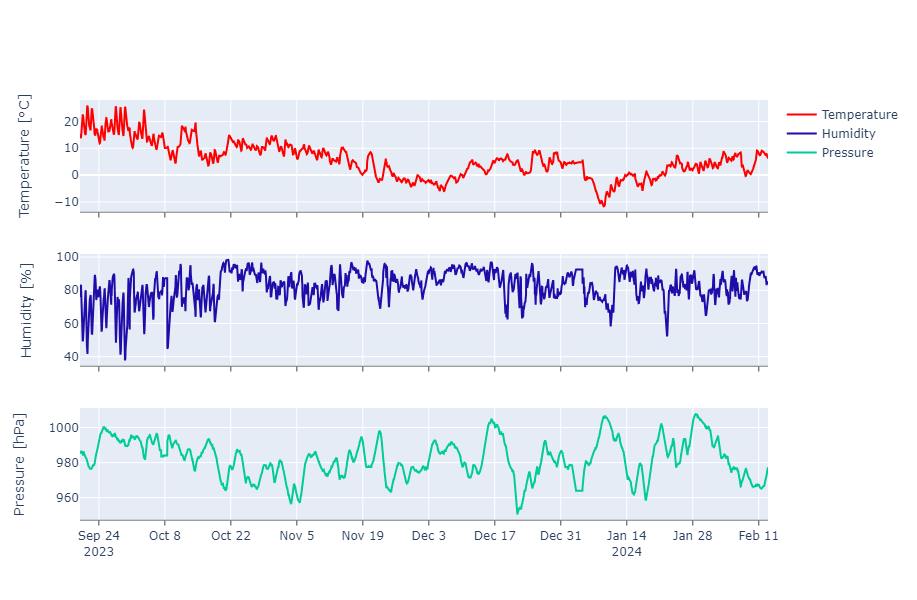

In [80]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

fig.add_trace(
    go.Scatter(
        x=df["last_changed"],
        y=df["out_temp"],
        mode="lines",
        name="Temperature",
        line=dict(color='red')),
    row=1,
    col=1
)

fig.update_yaxes(
    title_text="Temperature [°C]",
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=df["last_changed"],
        y=df["out_hum"],
        mode="lines",
        name="Humidity",
        line=dict(color='#1f0daa')),
    row=2,
    col=1
)

fig.update_yaxes(
    title_text="Humidity [%]",
    row=2,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df["last_changed"],
        y=df["pressure"],
        #color_discrete_sequence=['#7d8b94'],
        name='Pressure'),
    row=3,
    col=1
)

fig.update_yaxes(
    title_text="Pressure [hPa]",
    row=3,
    col=1,
)

fig.update_xaxes(row=1, col=1, showline=True, linewidth=0.5, linecolor='black', ticks="outside")
fig.update_xaxes(row=2, col=1, showline=True, linewidth=0.5, linecolor='black', ticks="outside")
fig.update_xaxes(row=3, col=1, showline=True, linewidth=0.5, linecolor='black', ticks="outside")


fig.update_layout(height=600)
fig.show()

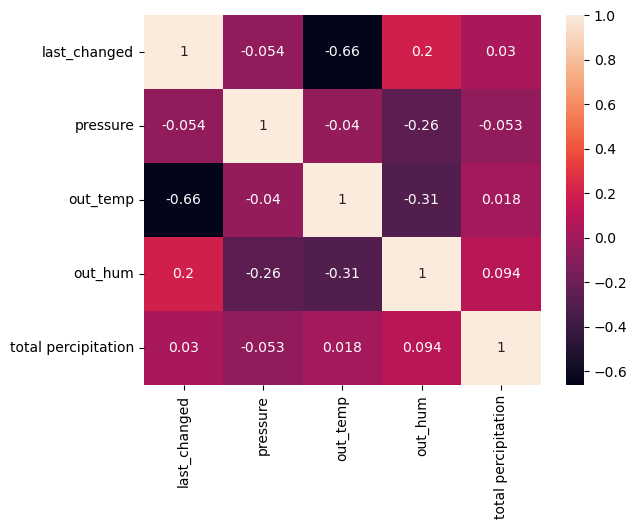

In [96]:
corr = df.corr()
#plt.figure(figsize = (15,15))
_ = sns.heatmap(corr, annot = True)

# Box plot temperatury

In [45]:
df['week_number'] = df['last_changed'].dt.isocalendar().week

In [46]:
df

,last_changed,pressure,out_temp,out_hum,total percipitation,week_number
0,2023-09-20 00:00:00+00:00,986.000000,15.300000,76.000000,0.00,38
1,2023-09-20 01:00:00+00:00,985.428571,14.528571,78.900000,0.00,38
2,2023-09-20 02:00:00+00:00,985.760000,14.212500,79.500000,0.00,38
3,2023-09-20 03:00:00+00:00,985.280000,14.041667,81.300000,0.00,38
4,2023-09-20 04:00:00+00:00,985.666667,13.833333,83.333333,0.25,38
...,...,...,...,...,...,...
3499,2024-02-12 19:00:00+00:00,974.777778,7.220000,85.166667,0.00,7
3500,2024-02-12 20:00:00+00:00,975.846154,7.020000,84.933333,0.00,7
3501,2024-02-12 21:00:00+00:00,976.846154,6.566667,84.033333,0.00,7
3502,2024-02-12 22:00:00+00:00,976.521739,6.370000,83.873913,0.00,7


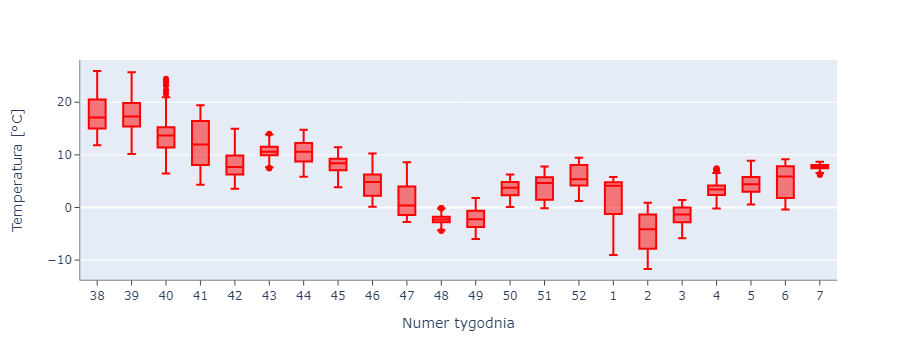

In [55]:
fig = px.box(df, x="week_number", y="out_temp", color_discrete_sequence=['red'],)
fig.update_xaxes(type='category')  # Ustawienie osi x jako kategorialnej
fig.update_yaxes(
    title_text="Temperatura [°C]",
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.update_xaxes(
    title_text="Numer tygodnia",
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)
fig.show()

#agregować dla 

# Box plot wilgotności

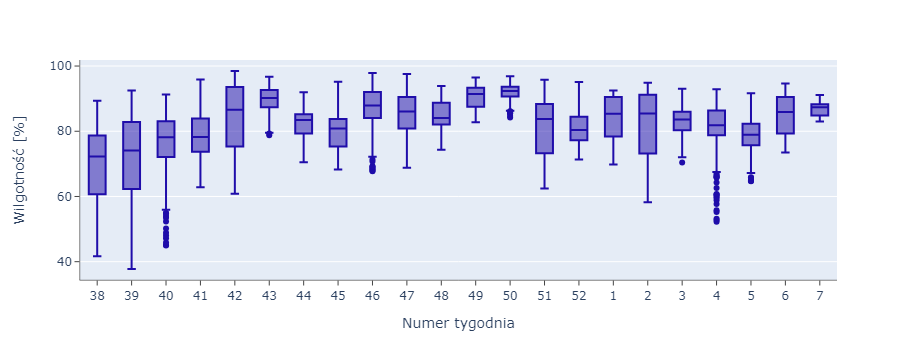

In [59]:
fig = px.box(df, x="week_number", y="out_hum", color_discrete_sequence=['#1f0daa'])
fig.update_xaxes(type='category')  
fig.update_yaxes(
    title_text="Wilgotność [%]",
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.update_xaxes(
    title_text="Numer tygodnia",
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)
fig.show()

# Box plot ciśnienia

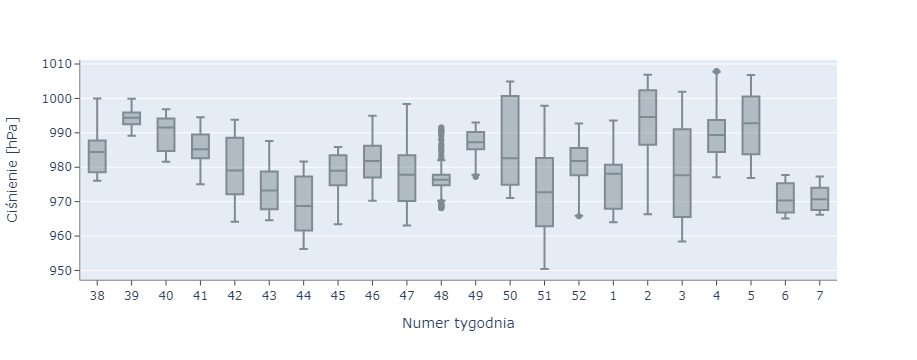

In [60]:
fig = px.box(df, x="week_number", y="pressure", color_discrete_sequence=['#7d8b94'])
fig.update_xaxes(type='category')  
fig.update_yaxes(
    title_text="Ciśnienie [hPa]",
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)

fig.update_xaxes(
    title_text="Numer tygodnia",
    showline=True,
    linewidth=0.5,
    linecolor='black',
    ticks="outside",
)
fig.show()